# 

## 1. Import module

In [1]:
## Basic Module

import os
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
# We'll code the graphs using 'matplotlib' but they'll be displayed with the 'seaborn' look
%matplotlib inline 
# 可內嵌繪圖，並且可省略 plt.show()這個指令

## NLP
# from ArticutAPI import ArticutAPI
# from ckip import CkipSegmenter
import jieba
import jieba.analyse
# For TF-IDF
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



## Don't show warning message
import warnings
warnings.filterwarnings(action='ignore')

## 2. Load Data

In [2]:
# 資料夾路徑
folder_path = './data'

# 取得資料夾中的所有檔案
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
print(files)

# 初始化一個空的DataFrame
df_combined_raw_data = pd.DataFrame()

# 迭代讀取並合併檔案
for file in files:
    file_path = os.path.join(folder_path, file)
    print(file_path)
    df = pd.read_excel(file_path)

    df_combined_raw_data = pd.concat([df_combined_raw_data, df], ignore_index=True)

# 顯示合併後的DataFrame
print("Combined DataFrame:")
df_combined_raw_data.head()

['Ga4報表_今周刊_20230901_20230930_100000.xlsx', 'Ga4報表_今周刊_20231001_20231031_100000.xlsx']
./data\Ga4報表_今周刊_20230901_20230930_100000.xlsx
./data\Ga4報表_今周刊_20231001_20231031_100000.xlsx
Combined DataFrame:


,文章ID,文章標題,瀏覽量,文章來源,文章屬性,名人專區,撰文,今周文章母分類,今周文章子分類,ESG文章母分類,ESG文章子分類,熟齡文章母分類,熟齡文章子分類,SEO分類,文章字數,上稿者,最後修改者,文章發布
0,202309020003,全台停班停課一覽》海葵何時最接近、基北北桃放不放颱風假？哪天風雨最大？一圖看懂影響時程,931713,數位部記者,生活消費,NaN,黃明惠 整理,職場生活,生活消費,NaN,NaN,NaN,NaN,海葵颱風/颱風假/颱風路徑/最新颱風動態/颱風會來嗎/海葵颱風動向/停班停課,3562,黃明惠,李易紓,2023-09-04
1,202305250031,明年過年放7天！2024年行事曆公布…3天以上連續假期有4個「開始排休囉」,378483,數位部記者,政治社會,NaN,李易紓整理,產業時事,政治社會,NaN,NaN,NaN,NaN,人事行政總處/2024年行事曆/113年行事曆/過年7天年假,1324,李易紓,李易紓,2023-06-20
2,202309040033,50歲勞保年資滿25年，老年給付可以領多少？2張表無腦看：一次領還是月領好？年金改革有什麼影響,317622,外稿/書摘/廣編（無稿費不可轉載),投資理財,各家之言,艾倫的理財研究室,保險稅制,勞保勞退,NaN,NaN,NaN,NaN,勞保/勞保 退休/勞保 一次領/勞保 月領/勞保 老年給付/勞保年金改革/勞保 年金,2422,洪慧如,洪慧如,2023-09-05
3,202309010002,海葵直撲「1130發陸警」，北市颱風假還有機會放？北台灣哪天影響最劇？,219304,數位部記者,生活消費,NaN,黃明惠 整理,職場生活,生活消費,NaN,NaN,NaN,NaN,海葵颱風/颱風假/氣象局/颱風會來嗎/最新颱風路徑/海葵颱風動向/颱風登陸,1228,黃明惠,黃明惠,2023-09-02
4,202309030005,14縣市週一確定停班課！「颱風假」放不放陸續公佈...海葵有多恐怖？民宿屋頂消失、萬人看恐怖...,190532,數位部記者,生活消費,NaN,林依榕整理,職場生活,生活消費,NaN,NaN,NaN,NaN,颱風動態/海葵/氣象局/停班停課/颱風假,1353,林依榕,林依榕,2023-09-03


In [3]:
df_raw_data_duplicated = df_combined_raw_data.copy()

## 3. Data preprocessing

### 3.1 Drop Duplicates
資料合併之後，會有同一個ID在不同月的檔案裡面，所以要將其瀏覽量做加總，並只留下一筆資料

In [4]:
df_raw_data_duplicated["文章ID"] = df_raw_data_duplicated["文章ID"].astype("str")

In [5]:
df_raw_data_unique = df_raw_data_duplicated.drop("瀏覽量", axis = 1)

df_raw_data_unique = df_raw_data_unique.drop_duplicates(ignore_index=True)

df_raw_data_unique.head()

,文章ID,文章標題,文章來源,文章屬性,名人專區,撰文,今周文章母分類,今周文章子分類,ESG文章母分類,ESG文章子分類,熟齡文章母分類,熟齡文章子分類,SEO分類,文章字數,上稿者,最後修改者,文章發布
0,202309020003,全台停班停課一覽》海葵何時最接近、基北北桃放不放颱風假？哪天風雨最大？一圖看懂影響時程,數位部記者,生活消費,NaN,黃明惠 整理,職場生活,生活消費,NaN,NaN,NaN,NaN,海葵颱風/颱風假/颱風路徑/最新颱風動態/颱風會來嗎/海葵颱風動向/停班停課,3562,黃明惠,李易紓,2023-09-04
1,202305250031,明年過年放7天！2024年行事曆公布…3天以上連續假期有4個「開始排休囉」,數位部記者,政治社會,NaN,李易紓整理,產業時事,政治社會,NaN,NaN,NaN,NaN,人事行政總處/2024年行事曆/113年行事曆/過年7天年假,1324,李易紓,李易紓,2023-06-20
2,202309040033,50歲勞保年資滿25年，老年給付可以領多少？2張表無腦看：一次領還是月領好？年金改革有什麼影響,外稿/書摘/廣編（無稿費不可轉載),投資理財,各家之言,艾倫的理財研究室,保險稅制,勞保勞退,NaN,NaN,NaN,NaN,勞保/勞保 退休/勞保 一次領/勞保 月領/勞保 老年給付/勞保年金改革/勞保 年金,2422,洪慧如,洪慧如,2023-09-05
3,202309010002,海葵直撲「1130發陸警」，北市颱風假還有機會放？北台灣哪天影響最劇？,數位部記者,生活消費,NaN,黃明惠 整理,職場生活,生活消費,NaN,NaN,NaN,NaN,海葵颱風/颱風假/氣象局/颱風會來嗎/最新颱風路徑/海葵颱風動向/颱風登陸,1228,黃明惠,黃明惠,2023-09-02
4,202309030005,14縣市週一確定停班課！「颱風假」放不放陸續公佈...海葵有多恐怖？民宿屋頂消失、萬人看恐怖...,數位部記者,生活消費,NaN,林依榕整理,職場生活,生活消費,NaN,NaN,NaN,NaN,颱風動態/海葵/氣象局/停班停課/颱風假,1353,林依榕,林依榕,2023-09-03


In [6]:
df_unique_column_names = ['文章ID']

In [7]:
summeries = {'瀏覽量': 'sum'}

df_all_sum = df_raw_data_duplicated.groupby(by = df_unique_column_names).agg(summeries)

df_all_sum = df_all_sum.sort_values("瀏覽量", ascending = False).reset_index()

df_all_sum = df_all_sum.rename(columns={"瀏覽量": "PV_Sum"})

df_all_sum_all = pd.merge(df_all_sum, df_raw_data_unique, how = 'inner')
# print(df_all_sum)

df_all_sum_all.head()

,文章ID,PV_Sum,文章標題,文章來源,文章屬性,名人專區,撰文,今周文章母分類,今周文章子分類,ESG文章母分類,ESG文章子分類,熟齡文章母分類,熟齡文章子分類,SEO分類,文章字數,上稿者,最後修改者,文章發布
0,202309020003,934864,全台停班停課一覽》海葵何時最接近、基北北桃放不放颱風假？哪天風雨最大？一圖看懂影響時程,數位部記者,生活消費,NaN,黃明惠 整理,職場生活,生活消費,NaN,NaN,NaN,NaN,海葵颱風/颱風假/颱風路徑/最新颱風動態/颱風會來嗎/海葵颱風動向/停班停課,3562,黃明惠,李易紓,2023-09-04
1,202305250031,849897,明年過年放7天！2024年行事曆公布…3天以上連續假期有4個「開始排休囉」,數位部記者,政治社會,NaN,李易紓整理,產業時事,政治社會,NaN,NaN,NaN,NaN,人事行政總處/2024年行事曆/113年行事曆/過年7天年假,1324,李易紓,李易紓,2023-06-20
2,202305250031,849897,明年過年放7天！2024年行事曆公布…3天以上連續假期有4個「開始排休囉」,數位部記者,政治社會,NaN,李易紓整理,產業時事,政治社會,NaN,NaN,NaN,NaN,人事行政總處/2024年行事曆/113年行事曆/過年7天年假,1343,李易紓,李易紓,2023-06-20
3,202309040033,352647,50歲勞保年資滿25年，老年給付可以領多少？2張表無腦看：一次領還是月領好？年金改革有什麼影響,外稿/書摘/廣編（無稿費不可轉載),投資理財,各家之言,艾倫的理財研究室,保險稅制,勞保勞退,NaN,NaN,NaN,NaN,勞保/勞保 退休/勞保 一次領/勞保 月領/勞保 老年給付/勞保年金改革/勞保 年金,2422,洪慧如,洪慧如,2023-09-05
4,202310060021,329234,名醫江坤俊妻子前進亞運金牌戰！她專攻「這項目」奪銀牌…聊到錢誰管，他說「薪水都入她戶頭」,數位部記者,健康休閒,NaN,胡肇芳 整理,職場生活,情感關係,NaN,NaN,靚女學,家庭關係,杭州亞運/杭州亞運賽程/江坤俊太太橋牌國手/江坤俊老婆/江坤俊太太名字/橋牌亞運,1108,肇芳,李易紓,2023-10-07


In [8]:
df_all_sum_all.columns

Index(['文章ID', 'PV_Sum', '文章標題', '文章來源', '文章屬性', '名人專區', '撰文', '今周文章母分類',
       '今周文章子分類', 'ESG文章母分類', 'ESG文章子分類', '熟齡文章母分類', '熟齡文章子分類', 'SEO分類',
       '文章字數', '上稿者', '最後修改者', '文章發布'],
      dtype='object')

In [9]:
df_data = df_all_sum_all[['文章ID', '文章標題', 'PV_Sum', '文章屬性',
                          '撰文', '今周文章母分類', '今周文章子分類']]

In [10]:
df_data.head()

,文章ID,文章標題,PV_Sum,文章屬性,撰文,今周文章母分類,今周文章子分類
0,202309020003,全台停班停課一覽》海葵何時最接近、基北北桃放不放颱風假？哪天風雨最大？一圖看懂影響時程,934864,生活消費,黃明惠 整理,職場生活,生活消費
1,202305250031,明年過年放7天！2024年行事曆公布…3天以上連續假期有4個「開始排休囉」,849897,政治社會,李易紓整理,產業時事,政治社會
2,202305250031,明年過年放7天！2024年行事曆公布…3天以上連續假期有4個「開始排休囉」,849897,政治社會,李易紓整理,產業時事,政治社會
3,202309040033,50歲勞保年資滿25年，老年給付可以領多少？2張表無腦看：一次領還是月領好？年金改革有什麼影響,352647,投資理財,艾倫的理財研究室,保險稅制,勞保勞退
4,202310060021,名醫江坤俊妻子前進亞運金牌戰！她專攻「這項目」奪銀牌…聊到錢誰管，他說「薪水都入她戶頭」,329234,健康休閒,胡肇芳 整理,職場生活,情感關係


In [11]:
df_data['文章屬性'].value_counts()

產業動態    3098
投資理財    2606
政治社會    1855
職場學習    1359
生活消費    1310
健康休閒    1306
國際總經     863
房地產      603
家庭教育     534
金融保險     476
幸福熟齡     448
ESG       86
訂閱制       64
Name: 文章屬性, dtype: int64

In [12]:
df_data['今周文章母分類'].unique()[:10]

array(['職場生活', '產業時事', '保險稅制', '投資理財', '產業時事/投資理財', '保險稅制/產業時事',
       '投資理財/投資理財', '投資理財/職場生活', '產業時事/產業時事', '幸福熟齡/職場生活'], dtype=object)

文章母分類不會有「房地產」類別

In [13]:
df_data['今周文章子分類'].value_counts()[:10]

政治社會    1405
科技       926
生活消費     820
理財       775
國際總經     738
傳產       694
台股       592
職場       574
健康       562
房地產      443
Name: 今周文章子分類, dtype: int64

### 3.2 篩選想要的資料

In [14]:
select_category = "房地產"

# 使用布林索引進行篩選
df_selected = df_data[df_data["文章屬性"] == select_category].reset_index(drop = True)

df_selected.head()

,文章ID,文章標題,PV_Sum,文章屬性,撰文,今周文章母分類,今周文章子分類
0,202307110029,「新青年安心成家房貸」8/1上路懶人包：利率、貸款資格一次看！第一次買房才能申請？破解3大迷思,97939,房地產,喬王的投資理財筆記,投資理財,房地產
1,202309110029,你家地基穩嗎？輸入門牌就能查！「高風險區」三重、新莊、北市這幾區上榜…全台地質最好縣市曝光,76252,房地產,翁申霖,投資理財,房地產
2,202310110010,砸125億救基泰神秘買家起底！不是富二代、僅高中學歷，42歲賓利哥如何從小代書翻200億身價...,52575,房地產,今周刊編輯團隊,投資理財,房地產
3,202109270018,住透天不如買電梯大樓？專家揭3未爆彈：幾十年後恐淪「下流貧民窟」,47993,房地產,好房網News / 王惠琳,投資理財,房地產
4,202310120041,2000萬養生宅有溫泉、餐飲、醫療、復健，也能月租6萬入住！彭培業從房仲跨界：想創造幸福感,32189,房地產,彭蕙珍,投資理財,房地產


In [15]:
df_selected['今周文章母分類'].value_counts()

投資理財                        380
投資理財/投資理財                   143
投資理財/財經時事/投資理財               10
保險稅制                          9
投資理財/投資理財/財經時事                7
財經時事/投資理財                     5
產業時事/投資理財                     5
投資理財/財經時事                     5
投資理財/投資理財/投資理財                3
職場生活                          3
投資理財/產業時事                     3
產業時事                          2
財經時事/投資理財/投資理財                2
保險稅制/投資理財                     2
投資理財/財經時事/財經時事/投資理財           2
投資理財/職場生活                     2
財經時事/產業時事/投資理財                1
財經時事/投資理財/今選頻道/產業時事/投資理財      1
財經時事/今選頻道/產業時事                1
競爭力/產業時事/財經時事                 1
投資理財/職場生活/投資理財                1
產業時事/職場生活                     1
投資理財/投資理財/今選頻道                1
投資理財/財經時事/財經時事/產業時事           1
投資理財/投資理財/競爭力                 1
投資理財/財經時事/產業時事/投資理財           1
對外供稿/投資理財/投資理財                1
投資理財/投資理財/今選頻道/競爭力            1
投資理財/今選頻道/投資理財                1
今選頻道/投資理財/投資理財/財經時事           1
投資理財/財經時事/投資理財/產業時事           1
投資理財/競爭力

In [16]:
df_selected['今周文章子分類'].value_counts()

房地產                      374
房地產/房地產掃瞄                 68
房地產掃瞄/房地產                 63
理財/房地產                     8
房地產掃瞄/產業動態/房地產             7
稅制                         7
焦點新聞/房地產                   5
房地產/焦點新聞                   5
房地產掃瞄                      4
政治社會/房地產                   3
房地產掃瞄/焦點新聞/房地產             3
房地產/政治社會                   3
房地產掃瞄/房地產/焦點新聞             2
保險                         2
房地產掃瞄/房地產/產業動態             2
房地產/房地產掃瞄/產業動態             2
理財                         2
個人成長/傳產/產業動態               1
聰明理財/房地產掃瞄/房地產             1
房地產掃瞄/情感關係                 1
字媒體/房地產/房地產掃瞄              1
產業動態/房地產掃瞄/話題人物/金融/理財      1
房地產/房地產掃瞄/個人成長             1
焦點新聞/話題人物/傳產               1
房地產掃瞄/產業動態/焦點新聞/房地產        1
房地產掃瞄/產業動態/焦點新聞/傳產         1
房地產/情感關係/房地產掃瞄             1
房地產/房地產掃瞄/名人專欄             1
房地產/房地產掃瞄/聰明理財             1
焦點新聞/傳產/房地產掃瞄              1
房地產/理財                     1
政治社會/美食旅遊                  1
房地產掃瞄/生活消費                 1
兩岸三地/房地產掃瞄/房地產             1
政治社會          

### 3.2 "文章母分類"、"文章子分類"：斜線分割，只留第一筆資料

In [17]:
for num in range(len(df_selected)):
    df_selected['今周文章母分類'][num] = df_selected['今周文章母分類'][num].split('/')[0]

df_selected['今周文章母分類'].value_counts()

投資理財             566
保險稅制              11
財經時事              10
產業時事               8
職場生活               3
今選頻道               2
安居好室 有願景的公益未來      1
對外供稿               1
競爭力                1
Name: 今周文章母分類, dtype: int64

In [18]:
for num in range(len(df_selected)):
    df_selected['今周文章子分類'][num] = df_selected['今周文章子分類'][num].split('/')[0]

df_selected['今周文章子分類'].value_counts()

房地產             463
房地產掃瞄            90
理財               11
稅制                9
焦點新聞              8
政治社會              5
保險                2
傳產                2
國際總經              1
 2023臺灣社會住宅展      1
職場                1
名人專欄              1
生活消費              1
退休                1
話題人物              1
字媒體               1
產業動態              1
台股                1
聰明理財              1
兩岸三地              1
個人成長              1
Name: 今周文章子分類, dtype: int64

## 4. EDA

In [19]:
## 定義中文字體
my_font_type = ['Microsoft YaHei']  # 'Microsoft YaHei': 微軟雅黑體

### 4.1 瀏覽量

In [20]:
print("瀏覽量最大值：", np.max(df_selected['PV_Sum']))
print("瀏覽量最小值：", np.min(df_selected['PV_Sum']))
print("瀏覽量中位數：", np.median(df_selected['PV_Sum']))
print("瀏覽量平均數：", np.mean(df_selected['PV_Sum']))
print("瀏覽量四分位數：", np.percentile(df_selected['PV_Sum'], (25, 50, 75), interpolation='midpoint'))

瀏覽量最大值： 97939
瀏覽量最小值： 38
瀏覽量中位數： 312.0
瀏覽量平均數： 2085.285240464345
瀏覽量四分位數： [ 136.5  312.  1148. ]


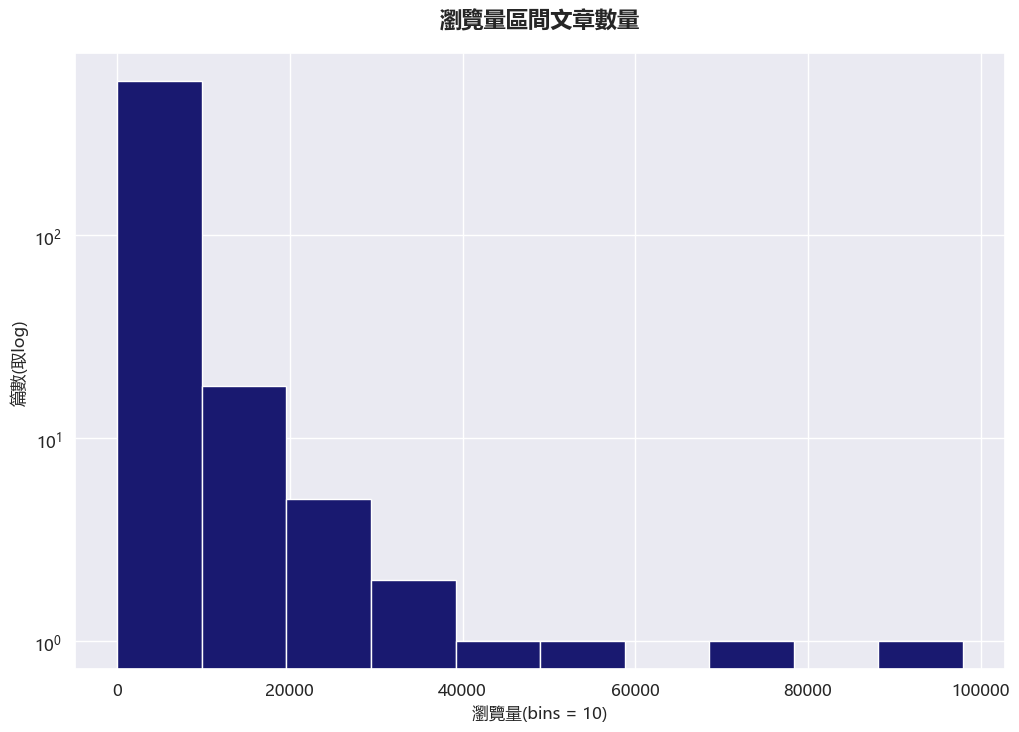

In [21]:
plt.figure(figsize = (12, 8))

plt.hist(x = df_selected['PV_Sum'], bins = 10, log = True, color = 'midnightblue')
## 組間資料量差距太大，使用log呈現

plt.rcParams['font.sans-serif'] = my_font_type

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title('瀏覽量區間文章數量', fontsize = 16, fontweight = 'bold', fontname = my_font_type, y = 1.03)

plt.xlabel('瀏覽量(bins = 10)', fontsize = 12, fontname = my_font_type)
plt.ylabel('篇數(取log)', fontsize = 12, fontname = my_font_type)

plt.show()

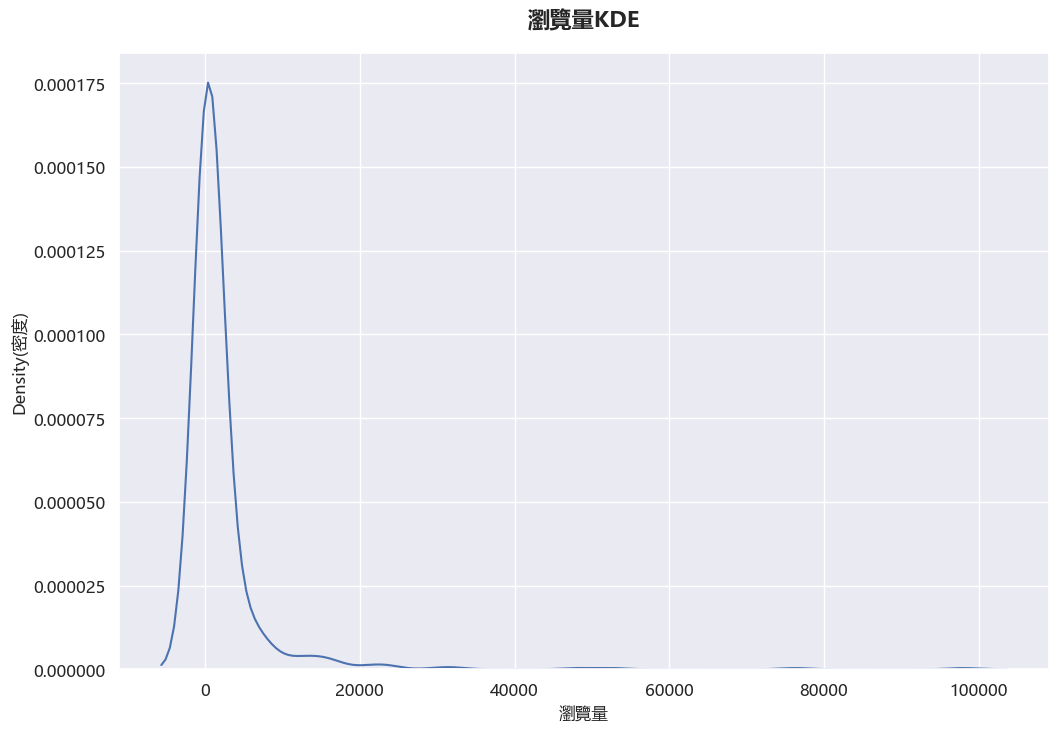

In [22]:
plt.figure(figsize = (12, 8))

plt.rcParams['font.sans-serif'] = my_font_type

sns.kdeplot(df_selected['PV_Sum'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title('瀏覽量KDE', fontsize = 16, fontweight = 'bold', fontname = my_font_type, y = 1.03)

plt.xlabel('瀏覽量', fontsize = 12, fontname = my_font_type)
plt.ylabel('Density(密度)', fontsize = 12, fontname = my_font_type)

plt.show()

#### 從上圖可以看到，大多數文章的瀏覽量集中在0~10000之間

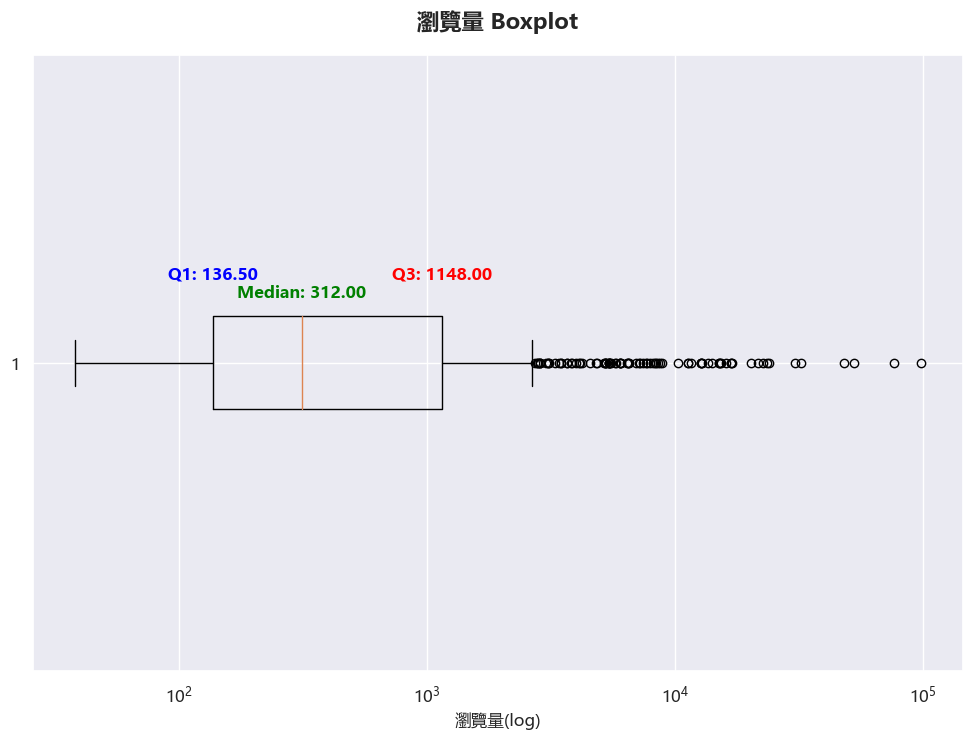

In [23]:
plt.figure(figsize = (12, 8))

plt.rcParams['font.sans-serif'] = my_font_type


# X軸使用對數
plt.xscale('log')

plt.boxplot(df_selected['PV_Sum'], vert = False)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.title('瀏覽量 Boxplot', fontsize = 16, fontweight = 'bold', fontname = my_font_type, y = 1.03)

plt.xlabel('瀏覽量(log)', fontsize = 12, fontname = my_font_type)

# # 取得四分位數資料
bp_q1 = np.percentile(df_selected['PV_Sum'], 25)
bp_median = np.percentile(df_selected['PV_Sum'], 50)
bp_q3 = np.percentile(df_selected['PV_Sum'], 75)

# 在 boxplot 上方添加文字標籤（注意對數尺度）
plt.text(bp_q1, 1.13, f'Q1: {bp_q1:.2f}', ha='center', va='bottom', fontweight='bold', color='blue')
plt.text(bp_median, 1.1, f'Median: {bp_median:.2f}', ha = 'center', va = 'bottom', fontweight = 'bold', color = 'green')
plt.text(bp_q3, 1.13, f'Q3: {bp_q3:.2f}', ha = 'center', va = 'bottom', fontweight = 'bold', color = 'red')


plt.show()

### 4.2 文章母分類

In [24]:
# 使用 value_counts() 方法
MAIN_value_counts_result = df_selected['今周文章母分類'].value_counts()

# 解包索引和數值
MAIN_categories, MAIN_counts = zip(*MAIN_value_counts_result.items())

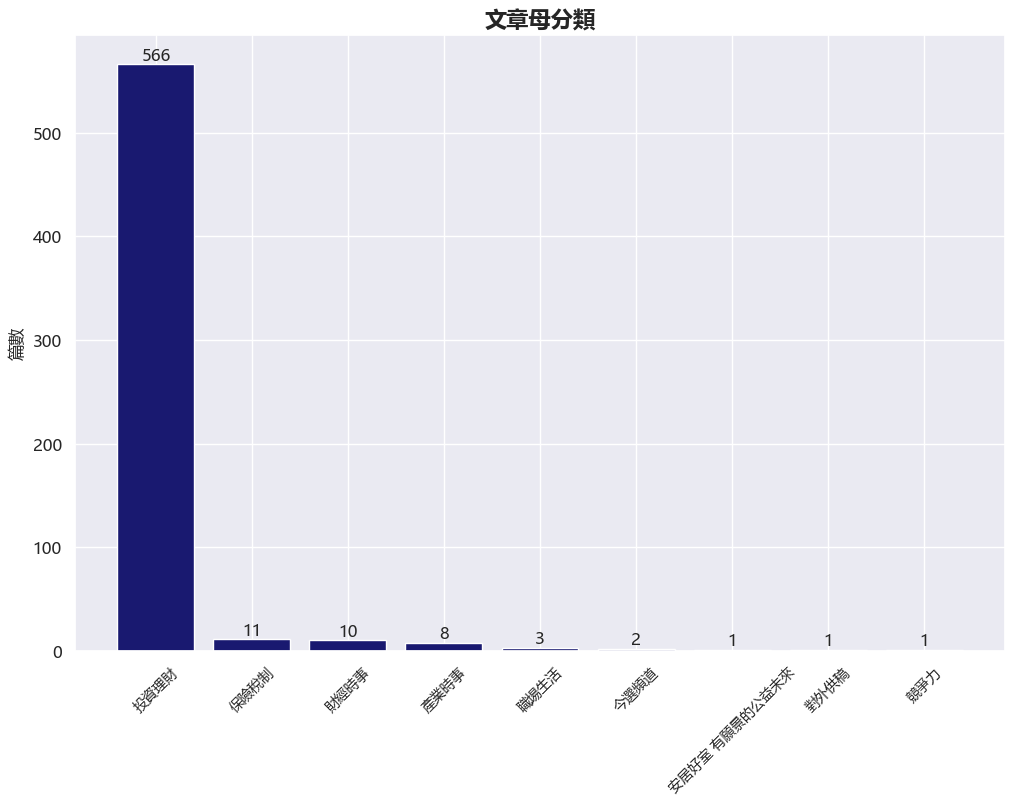

In [25]:
plt.figure(figsize = (12, 8))

plt.bar(x = MAIN_categories,
        height = MAIN_counts,
        color = 'midnightblue')

plt.rcParams['font.sans-serif'] = my_font_type

plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 12)

plt.title('文章母分類', fontsize = 16, fontweight = 'bold', fontname = my_font_type)
plt.ylabel('篇數', fontsize = 12, fontname = my_font_type)

## 顯示資料標籤
for i, count in enumerate(MAIN_counts):
    plt.text(MAIN_categories[i], count + 0.1, str(count), ha='center', va='bottom')
    
# ha='center' 表示居中對齊
# va='bottom' 表示文本垂直方向上對齊底部


### 4.3 文章子分類

In [26]:
# 使用 value_counts() 方法
SUB_value_counts_result = df_selected['今周文章子分類'].value_counts()

# 解包索引和數值
SUB_categories, SUB_counts = zip(*SUB_value_counts_result.items())

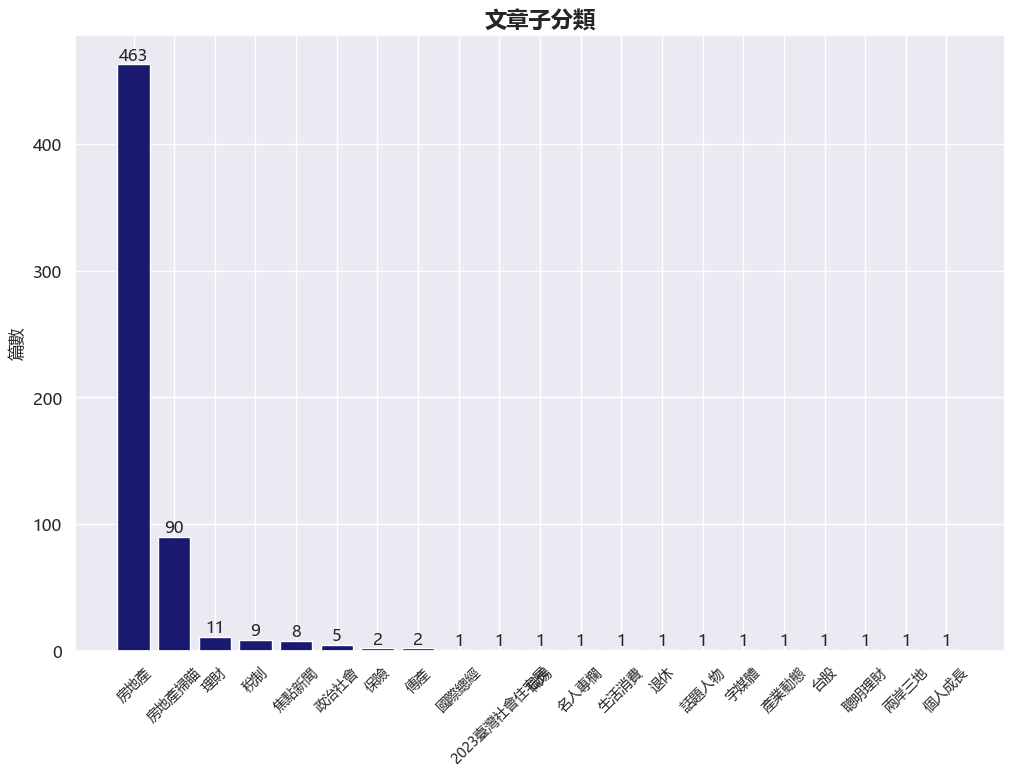

In [27]:
plt.figure(figsize = (12, 8))

plt.bar(x = SUB_categories,
        height = SUB_counts,
        color = 'midnightblue')

plt.rcParams['font.sans-serif'] = my_font_type

plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 12)

plt.title('文章子分類', fontsize = 16, fontweight = 'bold', fontname = my_font_type)
plt.ylabel('篇數', fontsize = 12, fontname = my_font_type)

## 顯示資料標籤
for i, count in enumerate(SUB_counts):
    plt.text(SUB_categories[i], count + 0.1, str(count), ha='center', va='bottom')
    
# ha='center' 表示居中對齊
# va='bottom' 表示文本垂直方向上對齊底部


## 5. 文本分析

In [28]:
inputSTR_LIST = []
for num in range(len(df_selected)):
    inputSTR_LIST.append(df_selected['文章標題'][num])
    inputSTR = " ".join(inputSTR_LIST)

inputSTR = inputSTR.replace('\u3000', ' ')
inputSTR[:100]

'「新青年安心成家房貸」8/1上路懶人包：利率、貸款資格一次看！第一次買房才能申請？破解3大迷思 你家地基穩嗎？輸入門牌就能查！「高風險區」三重、新莊、北市這幾區上榜…全台地質最好縣市曝光 砸125億救'

### jieba


https://blog.kennycoder.io/2020/02/12/Python-%E7%9F%A5%E5%90%8DJieba%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E%E5%B7%A5%E5%85%B7%E6%95%99%E5%AD%B8/

In [29]:
## 匯入繁體中文詞組包

jieba.set_dictionary('../dict.txt.big')

## 設定停用詞

jieba.analyse.set_stop_words('../Stopwords.txt')

### 5.1 TF-IDF

In [30]:
## Return all result
tags = jieba.analyse.extract_tags(inputSTR, topK = 20, withWeight = True)
# topK 代表返回 TF-IDF 權重最大的關鍵字，默認為 20
# withWeight 代表是否返回關鍵字權重值，默認為 False
# allowPOS 代表指定詞性，默認為空，也就是不篩選

word_num = 1
for tag in tags:
    print(f'word_{word_num}:', tag[0], 'tf-idf:', tag[1])
    word_num += 1

Building prefix dict from C:\Users\JoeJian\OneDrive - Business Today Magazine\桌面\Python Codes\Btoday_Analysis\dict.txt.big ...
Loading model from cache C:\Users\JoeJian\AppData\Local\Temp\jieba.uac7f789dec220013864bcc24deee4c4f.cache
Loading model cost 1.323 seconds.
Prefix dict has been built successfully.


word_1: 買房 tf-idf: 0.1894574881600634
word_2: 專家 tf-idf: 0.13778726411640974
word_3: 房價 tf-idf: 0.0947287440800317
word_4: 房貸 tf-idf: 0.09300640327857657
word_5: 30 tf-idf: 0.05511490564656389
word_6: 房東 tf-idf: 0.05511490564656389
word_7: 繼承 tf-idf: 0.049947883242198524
word_8: 10 tf-idf: 0.049947883242198524
word_9: 台灣 tf-idf: 0.0482255424407434
word_10: 房子 tf-idf: 0.04640702107655381
word_11: 一個 tf-idf: 0.04478086083783316
word_12: 房仲 tf-idf: 0.041336179234922915
word_13: 建商 tf-idf: 0.037891497632012675
word_14: 預售 tf-idf: 0.036169156830557554
word_15: 銀行 tf-idf: 0.036169156830557554
word_16: 20 tf-idf: 0.034446816029102434
word_17: 房市 tf-idf: 0.03404420482806512
word_18: 關鍵 tf-idf: 0.032724475227647314
word_19: 屋主 tf-idf: 0.032724475227647314
word_20: 申請 tf-idf: 0.03100213442619219


In [31]:
## Show POS = 'n'

tags = jieba.analyse.extract_tags(inputSTR, topK = 20, withWeight = True, allowPOS = 'n')

word_num = 1
for tag in tags:
    print(f'word_{word_num}:', tag[0], 'tf-idf:', tag[1])
    word_num += 1

word_1: 房子 tf-idf: 0.28888890878238566
word_2: 屋主 tf-idf: 0.2037135269552466
word_3: 租屋 tf-idf: 0.19080225645318385
word_4: 豪宅 tf-idf: 0.15531714146941702
word_5: 建商 tf-idf: 0.13938293949569505
word_6: 租金 tf-idf: 0.12549196806547083
word_7: 公寓 tf-idf: 0.12181570009140807
word_8: 房地 tf-idf: 0.11496109589704034
word_9: 房屋 tf-idf: 0.11273657224106727
word_10: 包租公 tf-idf: 0.10721764576591927
word_11: 老屋 tf-idf: 0.09874713806367713
word_12: 名下 tf-idf: 0.09604244566342601
word_13: 少子 tf-idf: 0.08802198063282511
word_14: 小心 tf-idf: 0.08433658934236772
word_15: 空屋 tf-idf: 0.08253117402116592
word_16: 房租 tf-idf: 0.08003537138618835
word_17: 漏水 tf-idf: 0.07850817348764126
word_18: 原因 tf-idf: 0.07549878267793722
word_19: 租房 tf-idf: 0.07511212575476232
word_20: 建案 tf-idf: 0.0750523520361435


### jieba.lcut and Word Cloud

In [32]:
seg_list = []
seg_list = jieba.lcut(inputSTR, cut_all=False)
print('list: ',seg_list[:20])

list:  ['「', '新', '青年', '安心', '成家', '房貸', '」', '8', '/', '1', '上路', '懶人', '包', '：', '利率', '、', '貸款', '資格', '一次', '看']


In [33]:
# 移除停留詞
def remove_stop_words(file_name,seg_list):
    with open(file_name, 'r', encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
    new_list = []
  
    for seg in seg_list:
        if seg not in stop_words:
            new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = '../Stopwords.txt'
seg_list = remove_stop_words(file_name, seg_list)
print('remove_stop_words: ', seg_list[:20])

remove_stop_words:  ['新', '青年', '安心', '成家', '房貸', '上路', '懶人', '包', '利率', '貸款', '資格', '一次', '第一次', '買房', '申請', '破解', '迷思', ' ', '你家', '地基']


In [34]:
seg_list = [x.strip(' ') for x in seg_list]

In [35]:
def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq
sef_freq = count_segment_freq(seg_list)
sef_freq.head(10)

,count
seg,
,922
買房,110
買,94
萬,90
年,87
專家,80
房價,55
房貸,54
房子,51


In [36]:
my_font_path = 'C:/Users/JoeJian/OneDrive - Business Today Magazine/桌面/Python Codes/Font/jf-openhuninn-2.0.ttf'

seg_list=' '.join(seg_list)

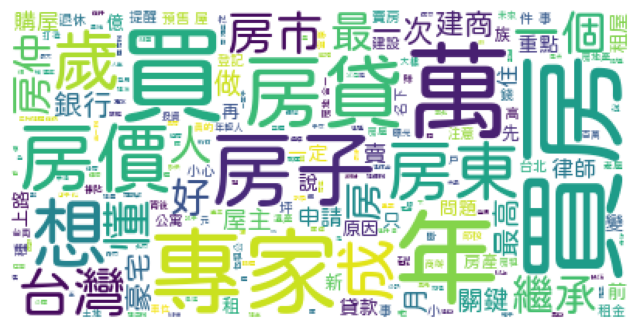

In [37]:
plt.figure(figsize = (8, 6))
wc = WordCloud(background_color='white', font_path = my_font_path)
wc.generate(seg_list)

plt.imshow(wc)
plt.axis("off")
plt.show()

### ckip

### Articut

In [38]:
# myarticut = ArticutAPI.Articut()

In [39]:
# resultDICT = myarticut.parse(inputSTR, level = 'lv2')

In [40]:
# resultDICT

In [41]:
# nounLIST = myarticut.getNounStemLIST(resultDICT)

In [42]:
# for num1 in range(len(nounLIST)):
#     for num2 in range(len(nounLIST[num1])):
#         print(nounLIST[num1][num2][2])
# nounLIST[0][0][2]

In [43]:
# len(nounLIST)